In [1]:
import warnings
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Word visualization
import matplotlib.pyplot as plt  # Plotting properties
import seaborn as sns  # Plotting properties
from sklearn.feature_extraction.text import CountVectorizer  # Data transformation
from sklearn.model_selection import train_test_split  # Data testing
from sklearn.linear_model import LogisticRegression  # Prediction Model

# Comparison between real and predicted
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import (
    LabelEncoder,
)  # Variable encoding and decoding for XGBoost
import re  # Regular expressions
import nltk
from nltk import word_tokenize
from pathlib import Path
import numpy as np
from collections import Counter

nltk.download("stopwords")
nltk.download("punkt")
# Construct the path to the CSV file
csv_path_train = "/Users/kamil/Documents/ml/sentimaniac/datasets/twitter_training.csv"
csv_path_val = "/Users/kamil/Documents/ml/sentimaniac/datasets/twitter_validation.csv"

# Read the CSV file
train = pd.read_csv(csv_path_train, encoding='utf-8', header=None)
val = pd.read_csv(csv_path_val, encoding='utf-8', header=None)

[nltk_data] Downloading package stopwords to /Users/kamil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kamil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train.columns=['id','type','sentiment','text']
train.head()

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
val.columns=['id','type','sentiment','text']
val.head()

,id,type,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
train_data=train
train_data

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
val_data=val
val_data

,id,type,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
train.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

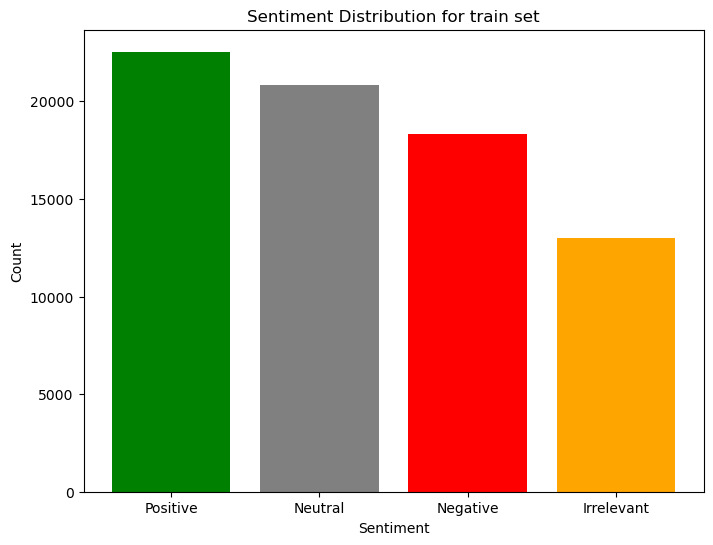

In [7]:
sentiment_counts = train['sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
colors = ['green', 'gray', 'red', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for train set')
plt.show()

In [8]:
val.sentiment.value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

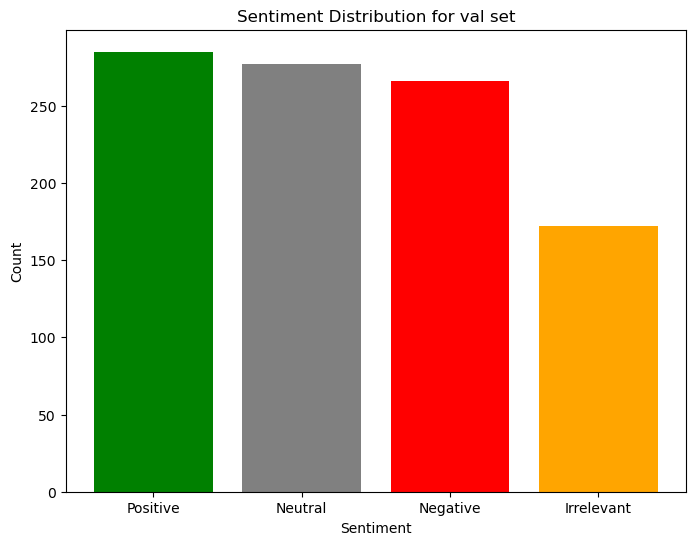

In [9]:
sentiment_counts = val['sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
colors = ['green', 'gray', 'red', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for val set')
plt.show()

Data cleaning: Rows containing missing values in training and test data are deleted.

In [10]:
train_data.isna().sum().sum()

686

In [11]:
train_data = train_data.dropna()

In [12]:
train_data.isna().sum().sum()

0

In [13]:
train_data

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [14]:
val_data.isna().sum().sum()

0

In [15]:
val_data = val_data.dropna()

In [16]:
val_data.isna().sum().sum()

0

Preparation of text data: Text is converted into a form suitable for analysis by reducing letters, removing special characters using regular expressions.

In [17]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
#train_data["lower"] = train_data.lower.apply(lambda x: re.sub(r"\W", " ", x))
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

/var/folders/8p/63nc49_90hn9htyn9b7mfxd00000gn/T/ipykernel_1199/3438242771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=train_data.text.str.lower() #lowercase
/var/folders/8p/63nc49_90hn9htyn9b7mfxd00000gn/T/ipykernel_1199/3438242771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
/var/folders/8p/63nc49_90hn9htyn9b7mfxd00000gn/T/ipykernel_1199/3438242771.py:4: SettingWithCopyWarning: 
A valu

In [18]:
train_data.head()

,id,type,sentiment,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


Word cloud creation: A word cloud is created for each sentiment class (positive, neutral, negative) based on the processed texts.

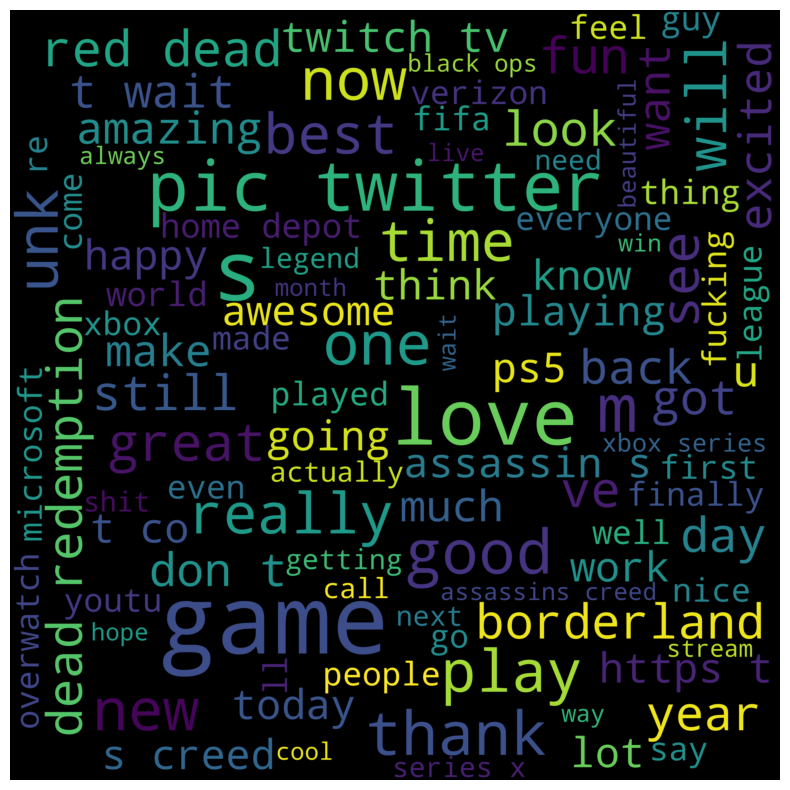

In [19]:
#positive
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

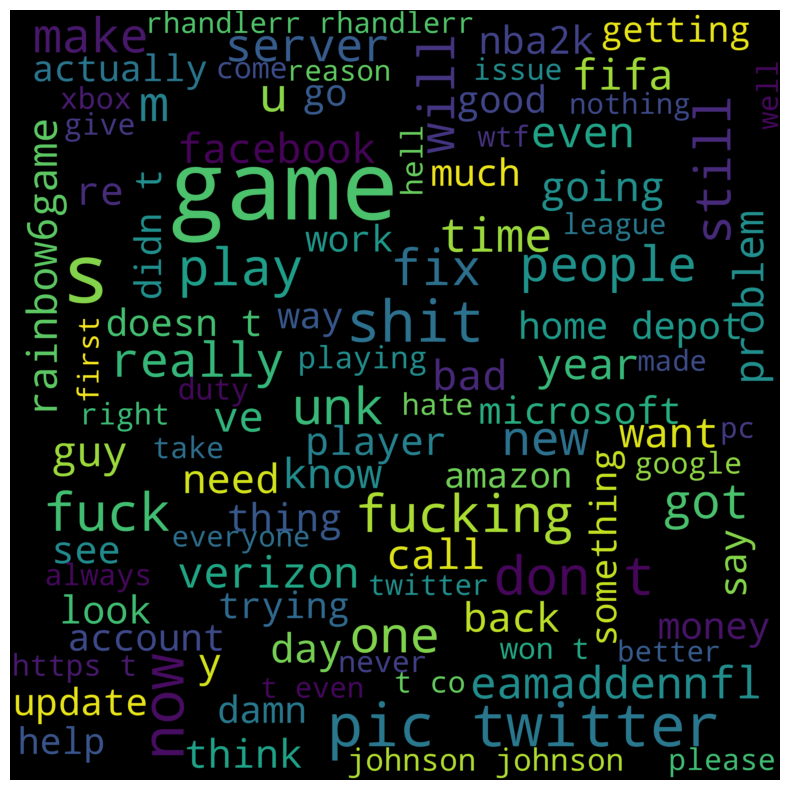

In [20]:
#neutral
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

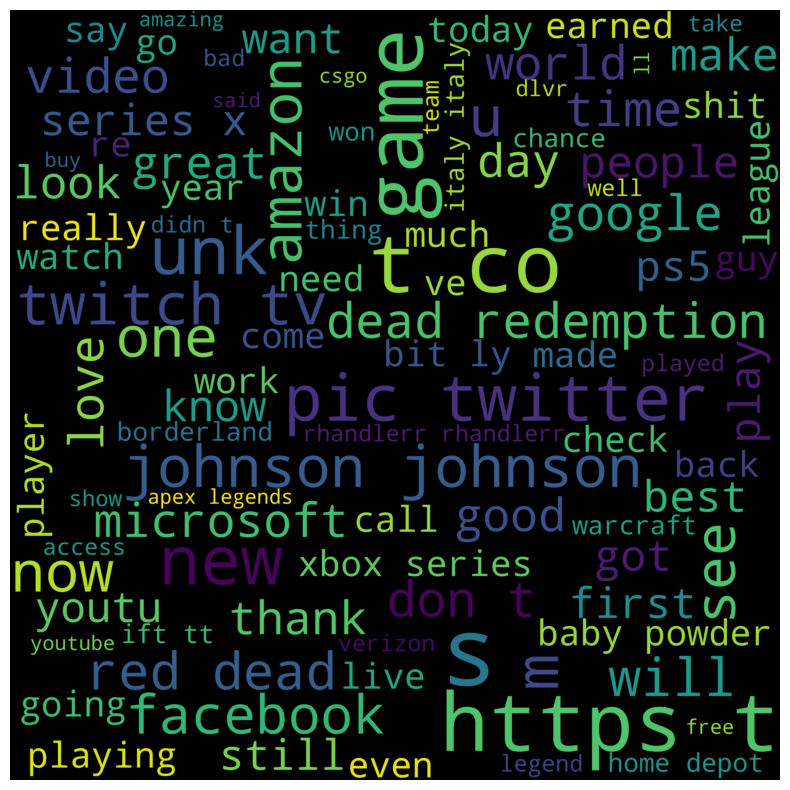

In [21]:
#negative
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

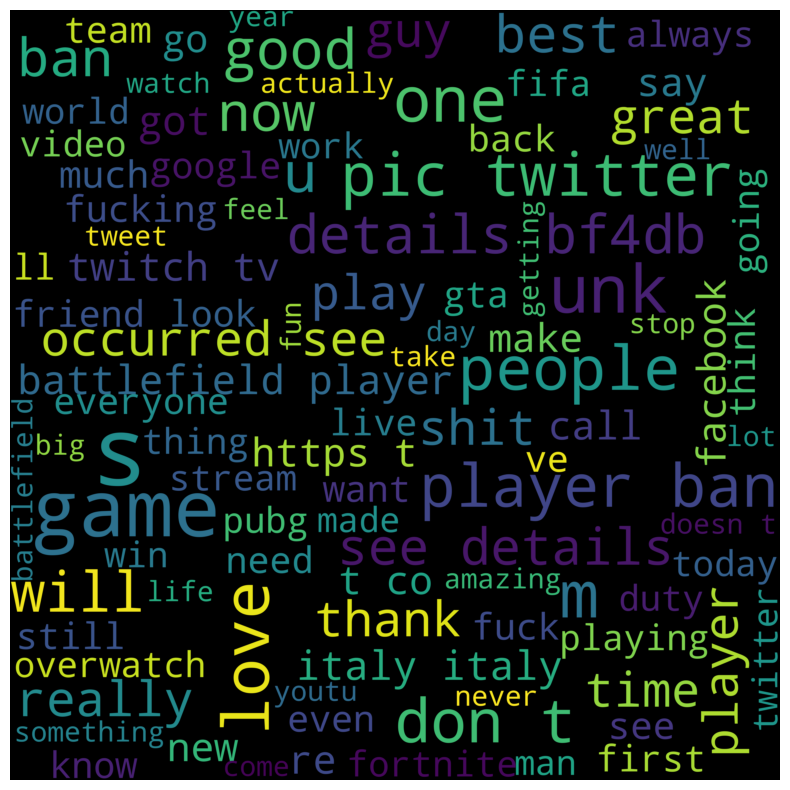

In [22]:
#irrelevant
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#Count information per category
plot1=train_data.groupby(by=["type","sentiment"]).count().reset_index()
plot1.head()

,type,sentiment,id,text,lower
0,Amazon,Irrelevant,186,186,186
1,Amazon,Negative,575,575,575
2,Amazon,Neutral,1207,1207,1207
3,Amazon,Positive,308,308,308
4,ApexLegends,Irrelevant,192,192,192


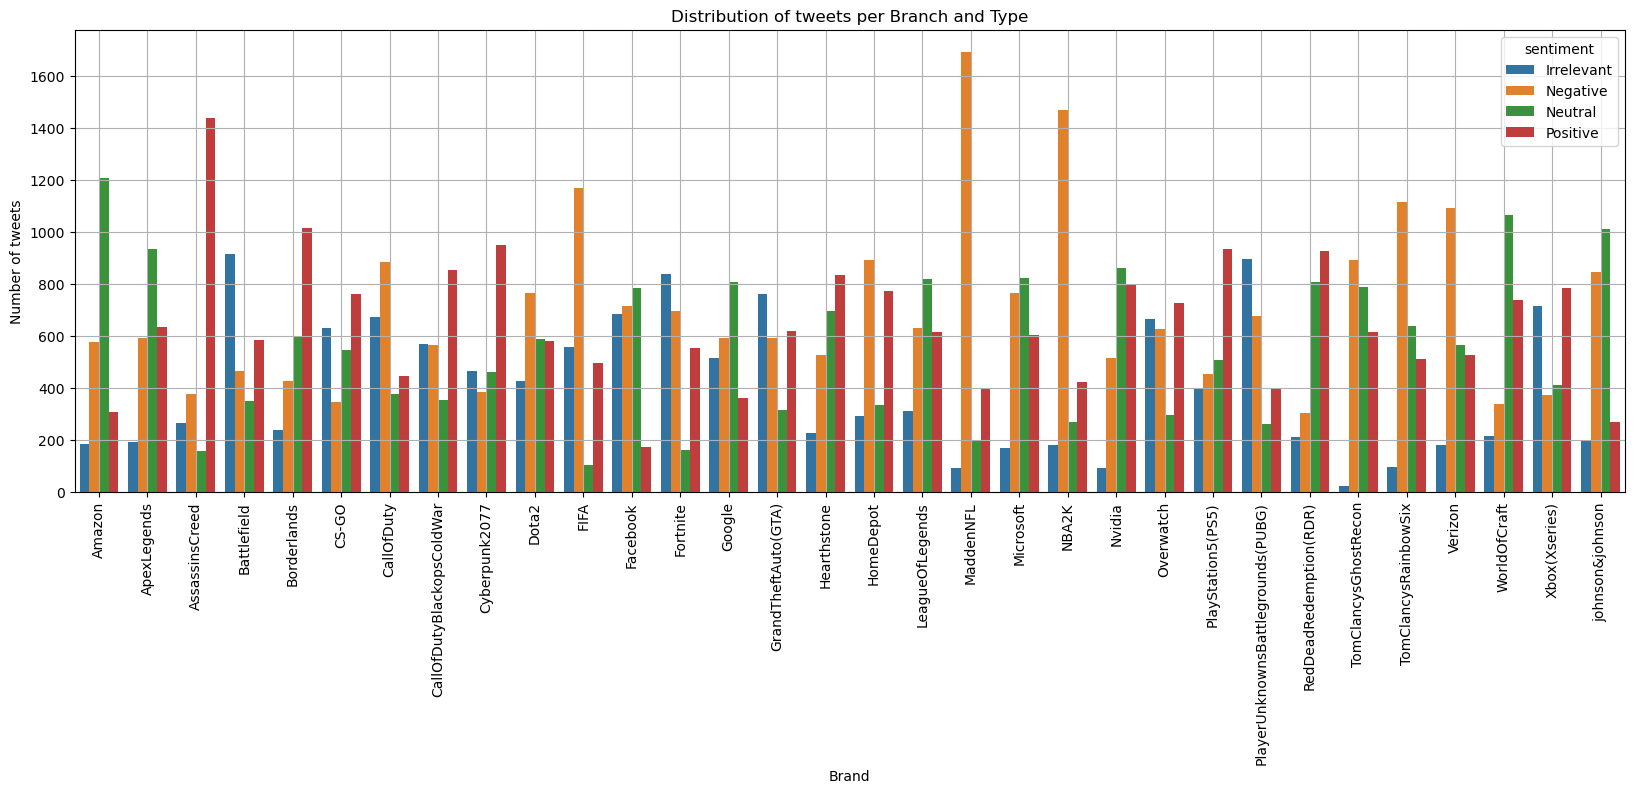

In [24]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="type",y="id",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [25]:
# Tokenization
train_data_plot = train_data
train_data_plot['word_count'] = train_data['lower'].apply(lambda x: len(str(x).split()))
train_data_plot['avg_word_length'] = train_data['lower'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
train_data_plot['unique_words'] = train_data['lower'].apply(lambda x: len(set(str(x).split())))

# Descriptive Statistics
train_data.describe()

/var/folders/8p/63nc49_90hn9htyn9b7mfxd00000gn/T/ipykernel_1199/2957645586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_plot['word_count'] = train_data['lower'].apply(lambda x: len(str(x).split()))
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/8p/63nc49_90hn9htyn9b7mfxd00000gn/T/ipykernel_1199/2957645586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,id,word_count,avg_word_length,unique_words
count,73996.000000,73996.000000,73698.000000,73996.000000
mean,6430.279231,19.499513,4.427189,17.643265
std,3737.660027,14.334973,3.785826,11.998997
min,1.000000,0.000000,1.000000,0.000000
25%,3194.000000,8.000000,3.846154,8.000000
50%,6417.500000,16.000000,4.285714,15.000000
75%,9595.000000,27.000000,4.805556,25.000000
max,13200.000000,166.000000,396.000000,65.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


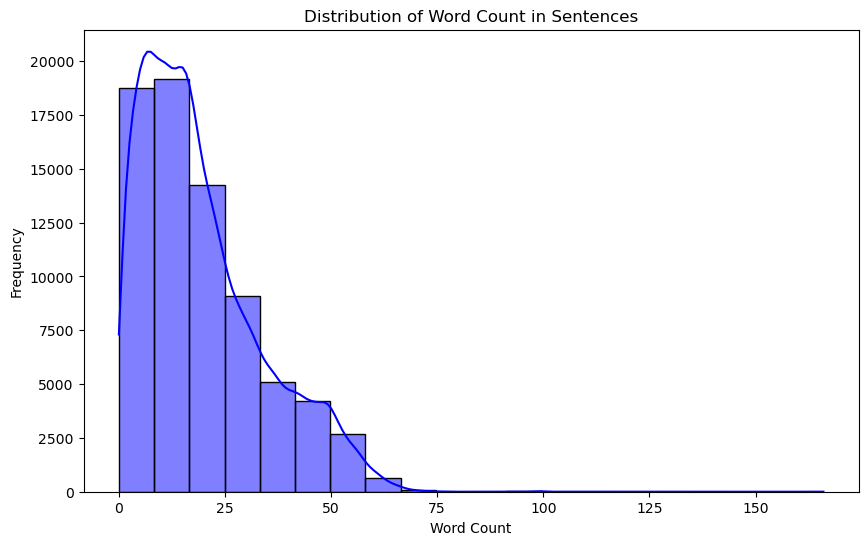

In [26]:
# Visualization of Descriptive Statistics
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['word_count'], kde=True, color='blue', bins=20)
plt.title('Distribution of Word Count in Sentences')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


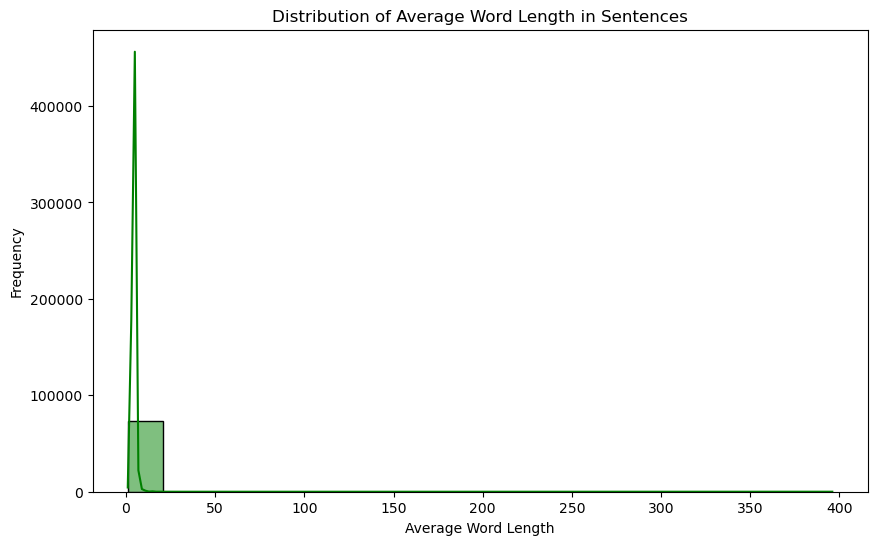

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['avg_word_length'], kde=True, color='green', bins=20)
plt.title('Distribution of Average Word Length in Sentences')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


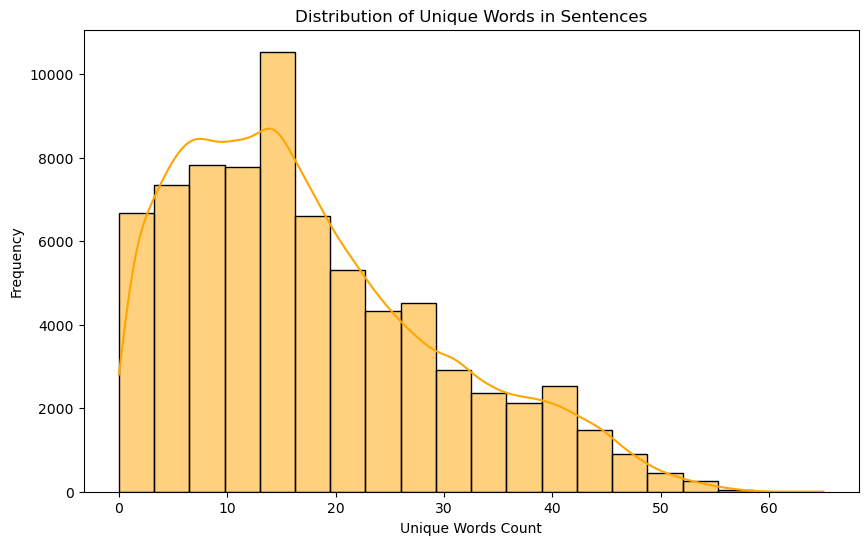

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['unique_words'], kde=True, color='orange', bins=20)
plt.title('Distribution of Unique Words in Sentences')
plt.xlabel('Unique Words Count')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


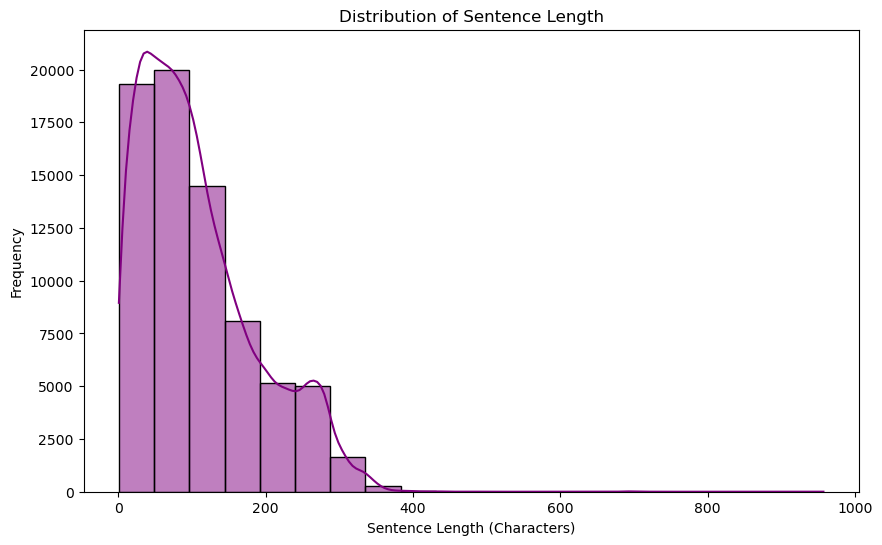

In [29]:
# Distribution of Sentence Length
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['text'].apply(len), kde=True, color='purple', bins=20)
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length (Characters)')
plt.ylabel('Frequency')
plt.show()

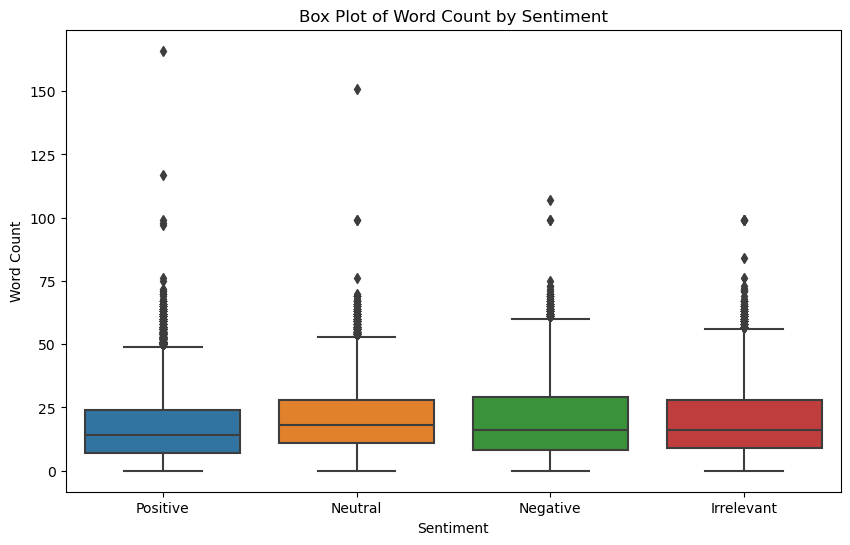

In [30]:
# Box Plot of Word Count by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data_plot, x='sentiment', y='word_count')
plt.title('Box Plot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

Splitting text into tokens: Text is divided into tokens (words or parts of words).

In [31]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


In [32]:
tokens_text[23]

['that',
 'was',
 'the',
 'first',
 'borderlands',
 'session',
 'in',
 'a',
 'hot',
 'row',
 'where',
 'i',
 'actually',
 'had',
 'a',
 'really',
 'bad',
 'combat',
 'experience',
 'i',
 'did',
 'some',
 'really',
 'good',
 'kills']

In [33]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Bag of Words (BoW): The text is represented as a bag of words, a compilation of all the unique words in the text along with their count.

In [34]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) 
)

Splitting the data into training and test sets: the data is split into training and test sets to evaluate the effectiveness of the model.

In [35]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=43)

In [36]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [37]:
X_test_bow

<14800x29017 sparse matrix of type '<class 'numpy.int64'>'
	with 159872 stored elements in Compressed Sparse Row format>

In [38]:
#Labels for train and test encoding
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']

In [39]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

sentiment
Negative      0.301014
Positive      0.281014
Neutral       0.243851
Irrelevant    0.174122
Name: count, dtype: float64

Learning the model: Using a logistic regression algorithm, the model is learned on training data.

In [40]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=150)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  82.3108108108108


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
#print('Predicted labels: ', test_pred[:232])

In [42]:
print("Classification Report for Test Data:")
print(classification_report(y_test_bow, test_pred))

Classification Report for Test Data:
              precision    recall  f1-score   support

  Irrelevant       0.88      0.76      0.81      2577
    Negative       0.82      0.84      0.83      4455
     Neutral       0.87      0.79      0.83      3609
    Positive       0.76      0.87      0.81      4159

    accuracy                           0.82     14800
   macro avg       0.83      0.82      0.82     14800
weighted avg       0.83      0.82      0.82     14800



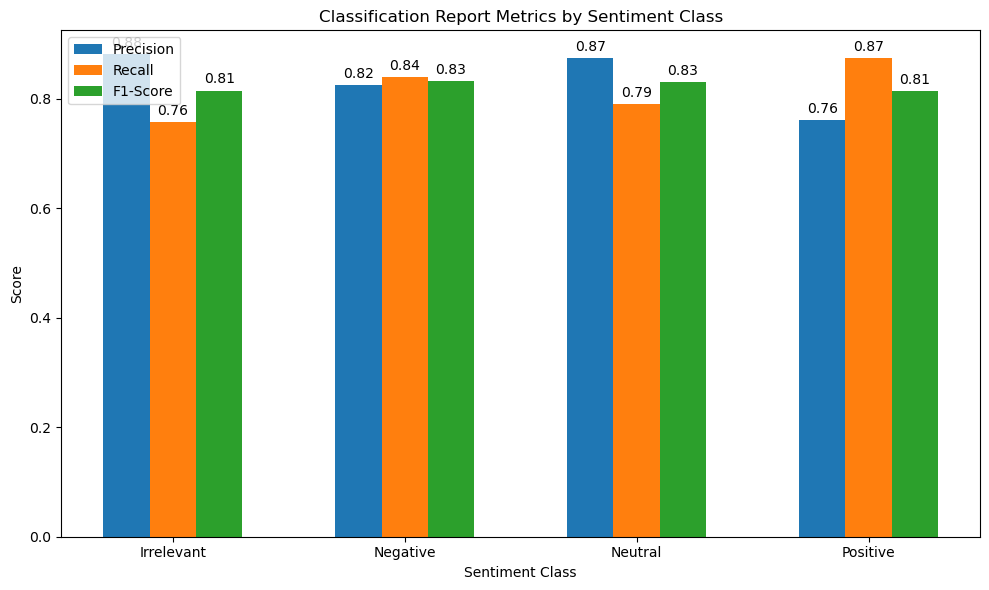

In [43]:
# Generate Classification Report
report = classification_report(y_test_bow, test_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]
f1_score = [report[class_]['f1-score'] for class_ in classes]

# Plotting
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
precision_bar = ax.bar(x - width, precision, width, label='Precision')
recall_bar = ax.bar(x, recall, width, label='Recall')
f1_score_bar = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics by Sentiment Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(precision_bar)
add_value_labels(recall_bar)
add_value_labels(f1_score_bar)

plt.tight_layout()
plt.show()


In [44]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['sentiment']

In [45]:
X_val_bow

<1000x29017 sparse matrix of type '<class 'numpy.int64'>'
	with 12914 stored elements in Compressed Sparse Row format>

Model evaluation: The effectiveness of the model is evaluated on test data using an accuracy (precision) metric.

In [46]:
val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, val_res) * 100)

Accuracy:  91.7


In [47]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [48]:
X_train_bow

<59196x1430467 sparse matrix of type '<class 'numpy.int64'>'
	with 4152319 stored elements in Compressed Sparse Row format>

In [49]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  91.5608108108108


In [50]:
y_val_bow = val_data['sentiment']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.5


Sentiment prediction: The predict_sentiment() function takes a sentence as input, processes it and predicts its sentiment using a learned model.

In [51]:
def predict_sentiment(model, bow_counts, sentence):
    # Preprocess input sentence
    processed_sentence = re.sub('[^A-Za-z0-9 ]+', ' ', sentence.lower())
    #print(processed_sentence)
    # Transform sentence using the same CountVectorizer
    transformed_sentence = bow_counts.transform([processed_sentence])
    #print(transformed_sentence)
    # Predict sentiment
    prediction = model2.predict(transformed_sentence)
    #print(prediction)
    if prediction == "Positive":
        return "Positive"
    elif prediction == "Neutral":
        return "Neutral"
    elif prediction == "Negative":
        return "Negative"
    else:
        return "Irrelevant"

In [ ]:
test_sentence = input("Sentence: ")
print(f"Sentiment for '{test_sentence}':", predict_sentiment(model2, bow_counts, test_sentence))